# Solving ODEs in Python

When solving ODEs in Python, the scipy module offers are two main functions to do so:
* `scipy.integrate.odeint`
* `scipy.integrate.solve_ivp`

If you dont have `scipy` installed, do a quick:
`>>pip install scipy`

## What are ODE's?
------


### Definition and Basic Concepts
ODEs are mathematical equations that link a function $y$ to its derivatives $y', y'', y^{(3)}, ...$. 
The term "ordinary" signifies that these equations involve derivatives with respect to a single independent variable (for example time only).

For example:
* The Malthusian growth model:
$$\frac{dN}{dt} = rN$$

* Newton's Law of Cooling: 
$$\frac{dT}{dt} = k(T-T_{ambient})$$

* Simple Harmonic Motion (Damped Spring-Mass):
$$m\frac{d^2 x}{dt^2} + b\frac{dx}{dt} + kx = 0$$

* Or Any Non-Temporal Mathematical ODEs:
$$y' + y = 4$$
$$y'' + 3y = e^{-2x}$$
$$y'' + 2y' - 2y = 0$$

Where $y' = \frac{dy}{dx}$ and $y'' = \frac{d^2 y}{dx^2}$


ODEs can have general solutions, which include arbitrary constants, and particular solutions, which are obtained by specifying initial conditions or boundary values.

#### 1. Initial Value Problems (IVPs):
These involve specifying the values of the function and its derivatives at a single point, often denoted as $t = t_0$.

$$ y'' + 2y' + y = 0$$
* Initial conditions at $t_0$: $y(0) = 1$ and $y'(0) = 0$.


#### 2. Boundary Value Problems (BVPs):
These involve specifying values of the function at different points.
$$ y'' + y = 0$$
* Boundary conditions at $t = 0 s$ and $t = 10 s$: $y(0) = 0$ and $y(10) = \pi$.

## Logic behind solving ODEs Numerically with Python
-------------------------------------

To be able to use `odetint` or `solve_ivp`, you have to package and define your ODE correctly.

1. **Rearrange the terms of your ODE**: Highest order derivative in one side, all the rest on the other side.

* Before:             $y'' + 2y' - 2y = 0$
* After:              $y'' = -2y' + 2y $


2. **Identify the Initial Conditions of your ODE**: If the Highest order of derivative is two -> Two initial Conditions.

* $y'(0) = ...$
* $y(0) = ...$

3. **Identify the Interval in which you want to solve your ODE**: It should be a discret interval (spacial/temporal/...)

* $0s < t < 10s$, across 100 points (each 0.1s)
* [or] $0m < x < 1m$, across 100 points (each 0.01m)

## How does `odeint`/`solve_ivp` work? 
--------------------------------

The function  ```odeint``` is used to simulate the evolution of a dynamic system described by ordinary differential equations. 

Inputs:
* Initial Condition of the system.
* A function describing the system of ode's $\frac{d\vec{S}}{dt} = A * \vec{S}$ (```system_of_odes```)
* The temproal domain in which we want to solve the system (```time_points```)
* Additional Arguments

How does it work?
* We have $S_0$ at $t = t_0$ (Initial Condition) -> We want $S_1$ at $t = t_1$
* We get $S_1$ utilizing the numerical scheme for calculating derivatives:

$$\frac{S_1 - S_0}{\Delta t} = \frac{dS}{dt}$$
$$S_1 = S_0 + \Delta t \frac{dS}{dt}$$


* We have $\Delta t$ (interval of ```time_points```) we need $\frac{dS}{dt}$.
* We get $\frac{dS}{dt}$ by replacing $S_0$ in our system of odes:

$\frac{d\vec{S}}{dt} = A * \vec{S_0}$

* Once we computed $S_1$, we repeat the process across all time points.

## `odeint`/`solve_ivp` in Python 
--------------------------------

`scipy.integrate.odeint(func, y0, t, args=(), rtol=None, atol=None, tfirst=False)`

Relevant input:
* `func`: Computes the derivate of $y$ at $t$
* `y0`: Initial condition
* `t`: Time points (must be monotone)
* `args`: Constants, and others..

(optionnal)

* rtol
* atol
* tfirst

For example lets solve: 
* The Malthusian growth model:
$$\frac{dN}{dt} = rN$$

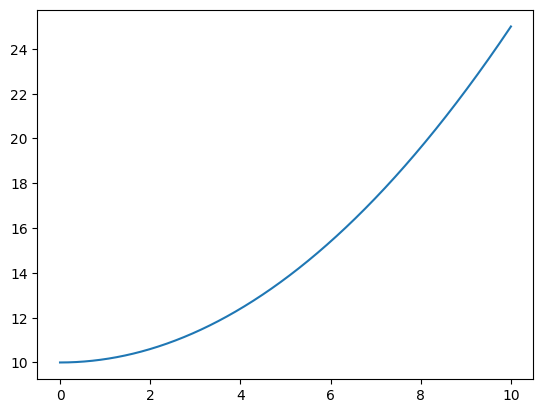

In [6]:
import numpy as np 
from scipy.integrate import odeint

# 1 - Constants, initial conditions and time points

N_0 = 10    # Initial number of individuals
r = 0.3       # Growth rate
time_points = np.linspace(0, 10, 1001) # Interval of Study


# 2 - Defining our function caracterizing our system of odes

def system_of_odes(y, t, r):
    N = y
    dNdt = r*N
    
    return dNdt

    


# 3 - Solving the system of odes with odeint

solution = odeint(system_of_odes, y0=N_0, t=time_points, args=(r,))
solution

import matplotlib.pyplot as plt 

plt.plot(time_points, solution)

-------
## Higher order ODEs

* We have $S_0, S'_0$ at $t = t_0$ (Initial Condition) -> We want $S_1, S'_1$ at $t = t_1$
* We get $S_1, S'_1$ utilizing the numerical scheme for calculating derivatives:

$$\frac{S'_1 - S'_0}{\Delta t} = \frac{d^2 S}{dt^2}$$
$$S'_1 = S'_0 + \Delta t \frac{d^2 S}{dt^2}$$


* We have $\Delta t$ (interval of ```time_points```) we need $\frac{d^2 S}{dt^2}$.
* We get $\frac{d^2 S}{dt^2}$ by replacing $S_0, S'_0$ in our system of odes:

$\frac{d^2\vec{S}}{dt^2} = A * F(\vec{S_0}, \vec{S'_0})$

* Once we computed $S'_1$, We use it to get $S_1$, and we repeat the process across all time points.

For example lets solve: 
* Simple Harmonic Motion (Damped Spring-Mass):
$$m\frac{d^2 x}{dt^2} + b\frac{dx}{dt} + kx = 0$$

$$\frac{d^2 x}{dt^2} =  -\frac{b}{m}\frac{dx}{dt} - \frac{k}{m}x$$

In [19]:
# Solving 2nd Order ODE

import numpy as np 
from scipy.integrate import odeint

# 1 - Constants, initial conditions and time points
m = 1 #kg
b = 0.1 
k = 0.1 #N/m

init_conditions = [1.0, 0.0] #Displacement, Velocity
time_points = np.linspace(0, 100, 1001)


# 2 - Defining our function caracterizing our system of odes

def system_of_odes(y, t, m, b, k):
    x, x_dot = y

    x_ddot = -b/m * x_dot - k/m * x

    return x_dot, x_ddot


# 3 - Solving the system of odes with odeint

solutions = odeint(system_of_odes, y0=init_conditions, t=time_points, args=(m, b, k))
x_sol = solutions[:, 0]
x_dot_sol = solutions[:, 1]

import matplotlib.pyplot as plt 

plt.plot(time_points, x_sol)
plt.plot(time_points, x_dot_sol)

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 9.99501704e-01, -9.94851154e-03,  9.99501704e-01,
        -9.94851154e-03],
       [ 9.98013930e-01, -1.97881366e-02,  9.98013930e-01,
        -1.97881366e-02],
       ...,
       [ 6.31523041e-03,  5.46386010e-04,  6.31523041e-03,
         5.46386010e-04],
       [ 6.36644086e-03,  4.77850931e-04,  6.36644086e-03,
         4.77850931e-04],
       [ 6.41080760e-03,  4.09522374e-04,  6.41080760e-03,
         4.09522374e-04]])